In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve

In [169]:
train_df = pd.read_csv("./databases/train.csv")
test_df =  pd.read_csv("./databases/test.csv")

In [170]:
train_df 

,Id,date,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,Usage_kWh
0,1,1/1/2018 0:15,2.95,0.0,0.00,73.21,100.0,900,Weekday,Monday,Light_Load,3.17
1,2,1/1/2018 0:30,4.46,0.0,0.00,66.77,100.0,1800,Weekday,Monday,Light_Load,4.00
2,3,1/1/2018 0:45,3.28,0.0,0.00,70.28,100.0,2700,Weekday,Monday,Light_Load,3.24
3,4,1/1/2018 1:00,3.56,0.0,0.00,68.09,100.0,3600,Weekday,Monday,Light_Load,3.31
4,5,1/1/2018 1:15,4.50,0.0,0.00,64.72,100.0,4500,Weekday,Monday,Light_Load,3.82
...,...,...,...,...,...,...,...,...,...,...,...,...
27994,27995,19/10/2018 14:45,32.62,0.0,0.02,85.75,100.0,53100,Weekday,Friday,Maximum_Load,54.36
27995,27996,19/10/2018 15:00,35.46,0.0,0.03,84.76,100.0,54000,Weekday,Friday,Maximum_Load,56.63
27996,27997,19/10/2018 15:15,30.92,0.0,0.03,89.63,100.0,54900,Weekday,Friday,Maximum_Load,62.50
27997,27998,19/10/2018 15:30,58.18,0.0,0.04,83.89,100.0,55800,Weekday,Friday,Maximum_Load,89.68


In [171]:
test_df

,Id,date,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,28000,19/10/2018 16:00,63.68,0.00,0.05,84.19,100.00,57600,Weekday,Friday,Maximum_Load
1,28001,19/10/2018 16:15,54.18,0.00,0.04,85.28,100.00,58500,Weekday,Friday,Maximum_Load
2,28002,19/10/2018 16:30,55.04,0.00,0.04,85.28,100.00,59400,Weekday,Friday,Maximum_Load
3,28003,19/10/2018 16:45,36.40,0.00,0.03,84.13,100.00,60300,Weekday,Friday,Maximum_Load
4,28004,19/10/2018 17:00,35.17,0.00,0.03,85.08,100.00,61200,Weekday,Friday,Maximum_Load
...,...,...,...,...,...,...,...,...,...,...,...
7036,35036,31/12/2018 23:00,4.86,0.00,0.00,62.10,100.00,82800,Weekday,Monday,Light_Load
7037,35037,31/12/2018 23:15,3.74,0.00,0.00,70.71,100.00,83700,Weekday,Monday,Light_Load
7038,35038,31/12/2018 23:30,3.17,0.07,0.00,76.62,99.98,84600,Weekday,Monday,Light_Load
7039,35039,31/12/2018 23:45,3.06,0.11,0.00,77.72,99.96,85500,Weekday,Monday,Light_Load


In [172]:
train_df_null = train_df.isnull()
print(train_df_null.sum())

Id                                         0
date                                       0
Lagging_Current_Reactive.Power_kVarh       0
Leading_Current_Reactive_Power_kVarh     119
CO2(tCO2)                                  0
Lagging_Current_Power_Factor               0
Leading_Current_Power_Factor              76
NSM                                        0
WeekStatus                              1774
Day_of_week                             1774
Load_Type                                  0
Usage_kWh                                  0
dtype: int64


In [173]:
test_df_null = test_df.isnull()
print(test_df_null.sum())

Id                                        0
date                                      0
Lagging_Current_Reactive.Power_kVarh      0
Leading_Current_Reactive_Power_kVarh      0
CO2(tCO2)                                 0
Lagging_Current_Power_Factor              0
Leading_Current_Power_Factor              0
NSM                                       0
WeekStatus                              692
Day_of_week                             692
Load_Type                                 0
dtype: int64


In [174]:
imputer_mean = SimpleImputer(missing_values=np.nan, strategy="mean")
train_df['Leading_Current_Reactive_Power_kVarh'] = imputer_mean.fit_transform(train_df[['Leading_Current_Reactive_Power_kVarh']])
train_df['Leading_Current_Power_Factor'] = imputer_mean.fit_transform(train_df[['Leading_Current_Power_Factor']])

In [175]:
def weekStatus(day):
    if day in ['Saturday','Sunday']:
        return 'Weekend'
    else:
        return 'Weekday'
    
train_df ['WeekStatus'] = train_df['Day_of_week'].apply(weekStatus)   
test_df ['WeekStatus'] = test_df['Day_of_week'].apply(weekStatus)   

In [176]:
train_df['date'] = pd.to_datetime(train_df['date'], format='%d/%m/%Y %H:%M')
test_df['date'] = pd.to_datetime(test_df['date'], format='%d/%m/%Y %H:%M')

train_df['Day_of_week'] = train_df['date'].dt.day_name()
test_df['Day_of_week'] = test_df['date'].dt.day_name()

In [177]:
train_df_null = train_df.isnull()
print(train_df_null.sum())

Id                                      0
date                                    0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
Usage_kWh                               0
dtype: int64


In [178]:
test_df_null = test_df.isnull()
print(test_df_null.sum())

Id                                      0
date                                    0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64


In [179]:
train_df

,Id,date,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,Usage_kWh
0,1,2018-01-01 00:15:00,2.95,0.0,0.00,73.21,100.0,900,Weekday,Monday,Light_Load,3.17
1,2,2018-01-01 00:30:00,4.46,0.0,0.00,66.77,100.0,1800,Weekday,Monday,Light_Load,4.00
2,3,2018-01-01 00:45:00,3.28,0.0,0.00,70.28,100.0,2700,Weekday,Monday,Light_Load,3.24
3,4,2018-01-01 01:00:00,3.56,0.0,0.00,68.09,100.0,3600,Weekday,Monday,Light_Load,3.31
4,5,2018-01-01 01:15:00,4.50,0.0,0.00,64.72,100.0,4500,Weekday,Monday,Light_Load,3.82
...,...,...,...,...,...,...,...,...,...,...,...,...
27994,27995,2018-10-19 14:45:00,32.62,0.0,0.02,85.75,100.0,53100,Weekday,Friday,Maximum_Load,54.36
27995,27996,2018-10-19 15:00:00,35.46,0.0,0.03,84.76,100.0,54000,Weekday,Friday,Maximum_Load,56.63
27996,27997,2018-10-19 15:15:00,30.92,0.0,0.03,89.63,100.0,54900,Weekday,Friday,Maximum_Load,62.50
27997,27998,2018-10-19 15:30:00,58.18,0.0,0.04,83.89,100.0,55800,Weekday,Friday,Maximum_Load,89.68


In [180]:
test_df

,Id,date,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,28000,2018-10-19 16:00:00,63.68,0.00,0.05,84.19,100.00,57600,Weekday,Friday,Maximum_Load
1,28001,2018-10-19 16:15:00,54.18,0.00,0.04,85.28,100.00,58500,Weekday,Friday,Maximum_Load
2,28002,2018-10-19 16:30:00,55.04,0.00,0.04,85.28,100.00,59400,Weekday,Friday,Maximum_Load
3,28003,2018-10-19 16:45:00,36.40,0.00,0.03,84.13,100.00,60300,Weekday,Friday,Maximum_Load
4,28004,2018-10-19 17:00:00,35.17,0.00,0.03,85.08,100.00,61200,Weekday,Friday,Maximum_Load
...,...,...,...,...,...,...,...,...,...,...,...
7036,35036,2018-12-31 23:00:00,4.86,0.00,0.00,62.10,100.00,82800,Weekday,Monday,Light_Load
7037,35037,2018-12-31 23:15:00,3.74,0.00,0.00,70.71,100.00,83700,Weekday,Monday,Light_Load
7038,35038,2018-12-31 23:30:00,3.17,0.07,0.00,76.62,99.98,84600,Weekday,Monday,Light_Load
7039,35039,2018-12-31 23:45:00,3.06,0.11,0.00,77.72,99.96,85500,Weekday,Monday,Light_Load


In [181]:
categorical_features = ['WeekStatus', 'Day_of_week', 'Load_Type']
label_encoder = LabelEncoder()
train_df_label_encoder = train_df.copy()
test_df_label_encoder = test_df.copy()

for feature in categorical_features:
    train_df_label_encoder[feature] = label_encoder.fit_transform(train_df_label_encoder[feature])
    test_df_label_encoder[feature] = label_encoder.transform(test_df_label_encoder[feature])

In [182]:
train_df

,Id,date,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,Usage_kWh
0,1,2018-01-01 00:15:00,2.95,0.0,0.00,73.21,100.0,900,Weekday,Monday,Light_Load,3.17
1,2,2018-01-01 00:30:00,4.46,0.0,0.00,66.77,100.0,1800,Weekday,Monday,Light_Load,4.00
2,3,2018-01-01 00:45:00,3.28,0.0,0.00,70.28,100.0,2700,Weekday,Monday,Light_Load,3.24
3,4,2018-01-01 01:00:00,3.56,0.0,0.00,68.09,100.0,3600,Weekday,Monday,Light_Load,3.31
4,5,2018-01-01 01:15:00,4.50,0.0,0.00,64.72,100.0,4500,Weekday,Monday,Light_Load,3.82
...,...,...,...,...,...,...,...,...,...,...,...,...
27994,27995,2018-10-19 14:45:00,32.62,0.0,0.02,85.75,100.0,53100,Weekday,Friday,Maximum_Load,54.36
27995,27996,2018-10-19 15:00:00,35.46,0.0,0.03,84.76,100.0,54000,Weekday,Friday,Maximum_Load,56.63
27996,27997,2018-10-19 15:15:00,30.92,0.0,0.03,89.63,100.0,54900,Weekday,Friday,Maximum_Load,62.50
27997,27998,2018-10-19 15:30:00,58.18,0.0,0.04,83.89,100.0,55800,Weekday,Friday,Maximum_Load,89.68


In [183]:
test_df

,Id,date,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,28000,2018-10-19 16:00:00,63.68,0.00,0.05,84.19,100.00,57600,Weekday,Friday,Maximum_Load
1,28001,2018-10-19 16:15:00,54.18,0.00,0.04,85.28,100.00,58500,Weekday,Friday,Maximum_Load
2,28002,2018-10-19 16:30:00,55.04,0.00,0.04,85.28,100.00,59400,Weekday,Friday,Maximum_Load
3,28003,2018-10-19 16:45:00,36.40,0.00,0.03,84.13,100.00,60300,Weekday,Friday,Maximum_Load
4,28004,2018-10-19 17:00:00,35.17,0.00,0.03,85.08,100.00,61200,Weekday,Friday,Maximum_Load
...,...,...,...,...,...,...,...,...,...,...,...
7036,35036,2018-12-31 23:00:00,4.86,0.00,0.00,62.10,100.00,82800,Weekday,Monday,Light_Load
7037,35037,2018-12-31 23:15:00,3.74,0.00,0.00,70.71,100.00,83700,Weekday,Monday,Light_Load
7038,35038,2018-12-31 23:30:00,3.17,0.07,0.00,76.62,99.98,84600,Weekday,Monday,Light_Load
7039,35039,2018-12-31 23:45:00,3.06,0.11,0.00,77.72,99.96,85500,Weekday,Monday,Light_Load


In [184]:
train_df_label_encoder

,Id,date,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,Usage_kWh
0,1,2018-01-01 00:15:00,2.95,0.0,0.00,73.21,100.0,900,0,1,0,3.17
1,2,2018-01-01 00:30:00,4.46,0.0,0.00,66.77,100.0,1800,0,1,0,4.00
2,3,2018-01-01 00:45:00,3.28,0.0,0.00,70.28,100.0,2700,0,1,0,3.24
3,4,2018-01-01 01:00:00,3.56,0.0,0.00,68.09,100.0,3600,0,1,0,3.31
4,5,2018-01-01 01:15:00,4.50,0.0,0.00,64.72,100.0,4500,0,1,0,3.82
...,...,...,...,...,...,...,...,...,...,...,...,...
27994,27995,2018-10-19 14:45:00,32.62,0.0,0.02,85.75,100.0,53100,0,0,1,54.36
27995,27996,2018-10-19 15:00:00,35.46,0.0,0.03,84.76,100.0,54000,0,0,1,56.63
27996,27997,2018-10-19 15:15:00,30.92,0.0,0.03,89.63,100.0,54900,0,0,1,62.50
27997,27998,2018-10-19 15:30:00,58.18,0.0,0.04,83.89,100.0,55800,0,0,1,89.68


In [185]:
test_df_label_encoder

,Id,date,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,28000,2018-10-19 16:00:00,63.68,0.00,0.05,84.19,100.00,57600,0,0,1
1,28001,2018-10-19 16:15:00,54.18,0.00,0.04,85.28,100.00,58500,0,0,1
2,28002,2018-10-19 16:30:00,55.04,0.00,0.04,85.28,100.00,59400,0,0,1
3,28003,2018-10-19 16:45:00,36.40,0.00,0.03,84.13,100.00,60300,0,0,1
4,28004,2018-10-19 17:00:00,35.17,0.00,0.03,85.08,100.00,61200,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
7036,35036,2018-12-31 23:00:00,4.86,0.00,0.00,62.10,100.00,82800,0,1,0
7037,35037,2018-12-31 23:15:00,3.74,0.00,0.00,70.71,100.00,83700,0,1,0
7038,35038,2018-12-31 23:30:00,3.17,0.07,0.00,76.62,99.98,84600,0,1,0
7039,35039,2018-12-31 23:45:00,3.06,0.11,0.00,77.72,99.96,85500,0,1,0


In [186]:
train_df_label_encoder['month'] = train_df_label_encoder['date'].dt.month
train_df_label_encoder['day'] = train_df_label_encoder['date'].dt.day
train_df_label_encoder['hour'] = train_df_label_encoder['date'].dt.hour
train_df_label_encoder['minute'] = train_df_label_encoder['date'].dt.minute
train_df_label_encoder = train_df_label_encoder.drop(columns=['date'])
train_df_label_encoder = train_df_label_encoder.drop(columns=['Id'])
train_df_label_encoder = train_df_label_encoder.drop(columns=['Day_of_week'])


test_df_label_encoder['month'] = test_df_label_encoder['date'].dt.month
test_df_label_encoder['day'] = test_df_label_encoder['date'].dt.day
test_df_label_encoder['hour'] = test_df_label_encoder['date'].dt.hour
test_df_label_encoder['minute'] = test_df_label_encoder['date'].dt.minute   
test_df_label_encoder = test_df_label_encoder.drop(columns=['date'])
test_df_label_encoder = test_df_label_encoder.drop(columns=['Id'])
test_df_label_encoder = test_df_label_encoder.drop(columns=['Day_of_week'])

In [187]:
train_df_label_encoder

,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Load_Type,Usage_kWh,month,day,hour,minute
0,2.95,0.0,0.00,73.21,100.0,900,0,0,3.17,1,1,0,15
1,4.46,0.0,0.00,66.77,100.0,1800,0,0,4.00,1,1,0,30
2,3.28,0.0,0.00,70.28,100.0,2700,0,0,3.24,1,1,0,45
3,3.56,0.0,0.00,68.09,100.0,3600,0,0,3.31,1,1,1,0
4,4.50,0.0,0.00,64.72,100.0,4500,0,0,3.82,1,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27994,32.62,0.0,0.02,85.75,100.0,53100,0,1,54.36,10,19,14,45
27995,35.46,0.0,0.03,84.76,100.0,54000,0,1,56.63,10,19,15,0
27996,30.92,0.0,0.03,89.63,100.0,54900,0,1,62.50,10,19,15,15
27997,58.18,0.0,0.04,83.89,100.0,55800,0,1,89.68,10,19,15,30


In [188]:
test_df_label_encoder

,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Load_Type,month,day,hour,minute
0,63.68,0.00,0.05,84.19,100.00,57600,0,1,10,19,16,0
1,54.18,0.00,0.04,85.28,100.00,58500,0,1,10,19,16,15
2,55.04,0.00,0.04,85.28,100.00,59400,0,1,10,19,16,30
3,36.40,0.00,0.03,84.13,100.00,60300,0,1,10,19,16,45
4,35.17,0.00,0.03,85.08,100.00,61200,0,1,10,19,17,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7036,4.86,0.00,0.00,62.10,100.00,82800,0,0,12,31,23,0
7037,3.74,0.00,0.00,70.71,100.00,83700,0,0,12,31,23,15
7038,3.17,0.07,0.00,76.62,99.98,84600,0,0,12,31,23,30
7039,3.06,0.11,0.00,77.72,99.96,85500,0,0,12,31,23,45


In [189]:
scaler = StandardScaler()
selected_features = ['Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh', 
                           'CO2(tCO2)', 'Lagging_Current_Power_Factor','Leading_Current_Power_Factor', 
                           'NSM', 'WeekStatus', 'Load_Type','month', 'day','hour', 'minute']

train_df_scaled = train_df_label_encoder.copy()
test_df_scaled = test_df_label_encoder.copy()

train_df_scaled[selected_features] = pd.DataFrame(scaler.fit_transform(train_df_label_encoder[selected_features]))
test_df_scaled[selected_features] = pd.DataFrame(scaler.transform(test_df_label_encoder[selected_features]))

In [190]:
train_df_scaled

,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Load_Type,Usage_kWh,month,day,hour,minute
0,-0.624234,-0.518884,-0.720973,-0.346967,0.510866,-1.677242,-0.593644,-0.89182,3.17,-1.562057,-1.641156,-1.660539,-0.447268
1,-0.532550,-0.518884,-0.720973,-0.678975,0.510866,-1.641145,-0.593644,-0.89182,4.00,-1.562057,-1.641156,-1.660539,0.447172
2,-0.604197,-0.518884,-0.720973,-0.498020,0.510866,-1.605049,-0.593644,-0.89182,3.24,-1.562057,-1.641156,-1.660539,1.341612
3,-0.587196,-0.518884,-0.720973,-0.610924,0.510866,-1.568952,-0.593644,-0.89182,3.31,-1.562057,-1.641156,-1.516035,-1.341708
4,-0.530122,-0.518884,-0.720973,-0.784661,0.510866,-1.532855,-0.593644,-0.89182,3.82,-1.562057,-1.641156,-1.516035,-0.447268
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27994,1.177262,-0.518884,0.502008,0.299520,0.510866,0.416372,-0.593644,0.27397,54.36,1.679490,0.423581,0.362523,1.341612
27995,1.349701,-0.518884,1.113499,0.248482,0.510866,0.452469,-0.593644,0.27397,56.63,1.679490,0.423581,0.507027,-1.341708
27996,1.074042,-0.518884,1.113499,0.499550,0.510866,0.488566,-0.593644,0.27397,62.50,1.679490,0.423581,0.507027,-0.447268
27997,2.729209,-0.518884,1.724990,0.203630,0.510866,0.524662,-0.593644,0.27397,89.68,1.679490,0.423581,0.507027,0.447172


In [191]:
test_df_scaled

,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Load_Type,month,day,hour,minute
0,3.063156,-0.518884,2.336480,0.219096,0.510866,0.596856,-0.593644,0.27397,1.679490,0.423581,0.651532,-1.341708
1,2.486338,-0.518884,1.724990,0.275290,0.510866,0.632953,-0.593644,0.27397,1.679490,0.423581,0.651532,-0.447268
2,2.538555,-0.518884,1.724990,0.275290,0.510866,0.669050,-0.593644,0.27397,1.679490,0.423581,0.651532,0.447172
3,1.406776,-0.518884,1.113499,0.216003,0.510866,0.705146,-0.593644,0.27397,1.679490,0.423581,0.651532,1.341612
4,1.332093,-0.518884,1.113499,0.264979,0.510866,0.741243,-0.593644,0.27397,1.679490,0.423581,0.796036,-1.341708
...,...,...,...,...,...,...,...,...,...,...,...,...
7036,-0.508263,-0.518884,-0.720973,-0.919732,0.510866,1.607566,-0.593644,-0.89182,2.399833,1.800073,1.663063,-1.341708
7037,-0.576267,-0.518884,-0.720973,-0.475852,0.510866,1.643663,-0.593644,-0.89182,2.399833,1.800073,1.663063,-0.447268
7038,-0.610876,-0.509525,-0.720973,-0.171168,0.510208,1.679760,-0.593644,-0.89182,2.399833,1.800073,1.663063,0.447172
7039,-0.617555,-0.504177,-0.720973,-0.114458,0.509550,1.715857,-0.593644,-0.89182,2.399833,1.800073,1.663063,1.341612


In [192]:
z_scores_train = np.abs(stats.zscore(train_df_scaled[selected_features]))
outliers = z_scores_train > 3
print(outliers.sum())
outlier_indices = np.where(z_scores_train > 3)
outlier_indices = np.unique(outlier_indices[0])
train_df_scaled = train_df_scaled.drop(index=outlier_indices)

Lagging_Current_Reactive.Power_kVarh    314
Leading_Current_Reactive_Power_kVarh    388
CO2(tCO2)                                22
Lagging_Current_Power_Factor              0
Leading_Current_Power_Factor              0
NSM                                       0
WeekStatus                                0
Load_Type                                 0
month                                     0
day                                       0
hour                                      0
minute                                    0
dtype: int64


In [193]:
label = 'Usage_kWh'
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
validation_rmse = []

for i, (train_index, valid_index) in enumerate(kfold.split(train_df_scaled), 1):
    X_train, X_valid = train_df_scaled.iloc[train_index][selected_features], train_df_scaled.iloc[valid_index][selected_features]
    y_train, y_valid = train_df_scaled.iloc[train_index][label], train_df_scaled.iloc[valid_index][label]

    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred_valid = model.predict(X_valid)    
    rmse = np.sqrt(mean_squared_error(y_valid, y_pred_valid))
    print(f"Fold {i}-----------------------------------------")
    print(f"Validation RMSE: {rmse}")
    validation_rmse.append(rmse)

    test_predictions = model.predict(test_df_scaled[selected_features])    
    submission_df = pd.DataFrame({'Id': test_df['Id'], 'Usage_kWh_Predicted': test_predictions})
    submission_df.to_csv(f'predictions_fold_{i}.csv', index=False)

mean_validation_rmse = np.mean(validation_rmse)
print(f"Mean Validation RMSE: {mean_validation_rmse}")

Fold 1-----------------------------------------
Validation RMSE: 4.858964778935955
Fold 2-----------------------------------------
Validation RMSE: 4.445913908161422
Fold 3-----------------------------------------
Validation RMSE: 4.068608412197409
Fold 4-----------------------------------------
Validation RMSE: 4.547107623020455
Fold 5-----------------------------------------
Validation RMSE: 4.892934853927239
Fold 6-----------------------------------------
Validation RMSE: 4.349979520734913
Fold 7-----------------------------------------
Validation RMSE: 4.153999065831253
Fold 8-----------------------------------------
Validation RMSE: 5.141491288724637
Fold 9-----------------------------------------
Validation RMSE: 5.787878303720878
Fold 10-----------------------------------------
Validation RMSE: 5.008163464427099
Mean Validation RMSE: 4.725504121968127


In [194]:
label = 'Usage_kWh'
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
degrees = {'polynomialfeatures__degree': [1, 2, 3]}
validation_mae = []
validation_r2 = []
validation_rmse = []

for i, (train_index, valid_index) in enumerate(kfold.split(train_df_scaled), 1):
    X_train, X_valid = train_df_scaled.iloc[train_index][selected_features], train_df_scaled.iloc[valid_index][selected_features]
    y_train, y_valid = train_df_scaled.iloc[train_index][label], train_df_scaled.iloc[valid_index][label]

    model = make_pipeline(PolynomialFeatures(), LinearRegression())

    grid_search = GridSearchCV(model, degrees, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    
    y_pred_valid = model.predict(X_valid)
    mae = mean_absolute_error(y_valid, y_pred_valid)
    r2 = r2_score(y_valid, y_pred_valid)
    rmse = np.sqrt(mean_squared_error(y_valid, y_pred_valid))
   
    print(f"Fold {i}------------------------------------------")
    print(f"Validation R-squared: {r2}")
    print(f"Validation MAE: {mae}")
    print(f"Validation RMSE: {rmse}")
        
    validation_mae.append(mae)
    validation_r2.append(r2)
    validation_rmse.append(rmse)
    

    test_predictions = best_model.predict(test_df_scaled[selected_features])
    submission_df = pd.DataFrame({'Id': test_df['Id'], 'Usage_kWh_Predicted': test_predictions})
    submission_df.to_csv(f'predictions_fold_{i}.csv', index=False)

mean_validation_mae = np.mean(validation_mae)
mean_validation_r2 = np.mean(validation_r2)
mean_validation_rmse = np.mean(validation_rmse)

print(f"Mean Validation R-squared: {mean_validation_r2}")
print(f"Mean Validation MAE: {mean_validation_mae}")
print(f"Mean Validation RMSE: {mean_validation_rmse}")


Fold 1------------------------------------------
Validation R-squared: 0.9963104703177982
Validation MAE: 1.2246590345892714
Validation RMSE: 2.0013338217091174
Fold 2------------------------------------------
Validation R-squared: 0.9956950392440658
Validation MAE: 1.2685764076509682
Validation RMSE: 2.1599803394439103
Fold 3------------------------------------------
Validation R-squared: 0.9957474708589948
Validation MAE: 1.2536274984827318
Validation RMSE: 2.1014026593147617
Fold 4------------------------------------------
Validation R-squared: 0.9956267502101505
Validation MAE: 1.219355891903227
Validation RMSE: 2.1679660117014663
Fold 5------------------------------------------
Validation R-squared: 0.9967931766620085
Validation MAE: 1.1931097175735133
Validation RMSE: 1.89334788698709
Fold 6------------------------------------------
Validation R-squared: 0.9960260623190963
Validation MAE: 1.2323941958697562
Validation RMSE: 2.0987440106679975
Fold 7-------------------------------

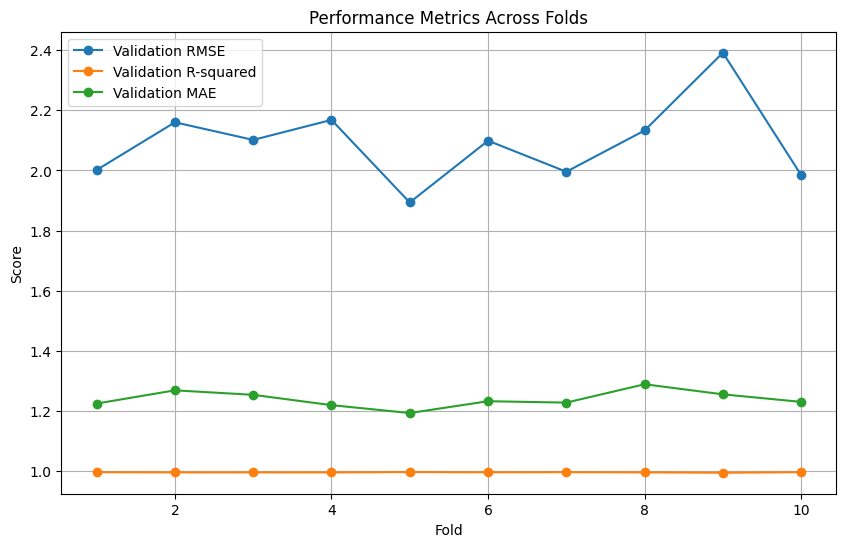

In [195]:
performance_metrics = {'Validation RMSE': validation_rmse, 'Validation R-squared': validation_r2, 'Validation MAE': validation_mae}
plt.figure(figsize=(10, 6))
for metric, values in performance_metrics.items():
    plt.plot(range(1, len(values) + 1), values, marker='o', label=metric)
plt.xlabel('Fold')
plt.ylabel('Score')
plt.title('Performance Metrics Across Folds')
plt.legend()
plt.grid(True)
plt.show()